In [1]:
! nvidia-smi

Tue Jun  9 16:43:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    31W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# # Colab
# ! pip install fastai2 -q
# ! pip install pydicom -q
# ! pip install kornia -q

In [0]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *
from fastai2.medical.imaging import *

import pydicom

import pandas as pd

In [5]:
dataset = 'jesperdramsch/siim-acr-pneumothorax-segmentation-data'

# Google Colab
config_path = Path('/content/drive')
learner_path = config_path/"My Drive"
data_path_base = Path('/content/datasets/')

path = data_path_base/dataset

from google.colab import drive

drive.mount(str(config_path))
os.environ['KAGGLE_CONFIG_DIR'] = f"{config_path}/My Drive/.kaggle"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# !kaggle datasets download {dataset} -p "{path}" --unzip

In [7]:
path.ls()

(#4) [Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/train-rle.csv'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-train'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-test'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/pneumothorax')]

In [8]:
(path/'dicom-images-train').ls()

(#10712) [Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1214.1517875166.812239'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32520.1517875160.990398'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14480.1517875252.313836'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14548.1517875252.639694'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.3151.1517875176.339181'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.31650.1517875156.50389'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-seg

In [9]:
items = get_dicom_files(path/'dicom-images-train')
items

(#10712) [Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.1214.1517875166.812239/1.2.276.0.7230010.3.1.3.8323329.1214.1517875166.812238/1.2.276.0.7230010.3.1.4.8323329.1214.1517875166.812240.dcm'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.32520.1517875160.990398/1.2.276.0.7230010.3.1.3.8323329.32520.1517875160.990397/1.2.276.0.7230010.3.1.4.8323329.32520.1517875160.990399.dcm'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14480.1517875252.313836/1.2.276.0.7230010.3.1.3.8323329.14480.1517875252.313835/1.2.276.0.7230010.3.1.4.8323329.14480.1517875252.313837.dcm'),Path('/content/datasets/jesperdramsch/siim-acr-pneumothorax-segmentation-data/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.14548.1517875252.639694/1.2.276.0.7230010.3.1.3.832

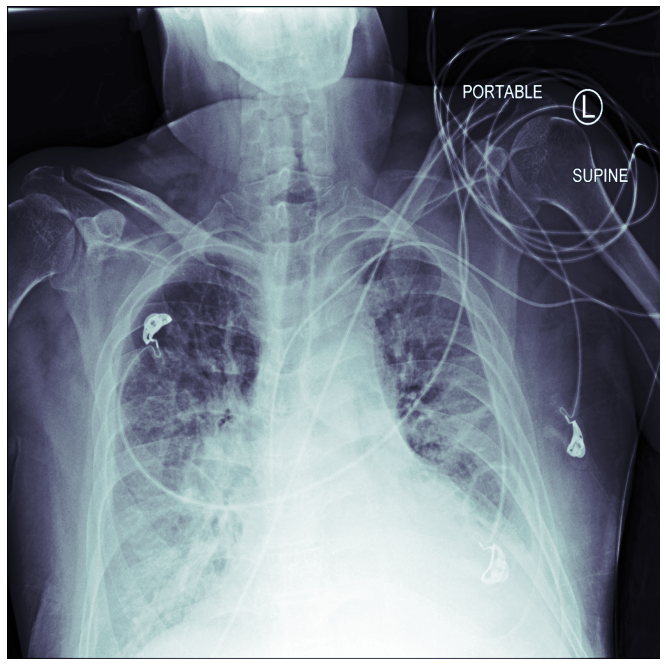

In [10]:
patient = 5555
xray_sample = dcmread(items[patient])
xray_sample.show(figsize=(12, 12))

In [11]:
xray_sample.as_dict()

{'AccessionNumber': '',
 'BitsAllocated': 8,
 'BitsStored': 8,
 'BodyPartExamined': 'CHEST',
 'Columns': 1024,
 'ConversionType': 'WSD',
 'HighBit': 7,
 'InstanceNumber': 1,
 'LossyImageCompression': '01',
 'LossyImageCompressionMethod': 'ISO_10918_1',
 'Modality': 'CR',
 'MultiPixelSpacing': 1,
 'PatientAge': '59',
 'PatientBirthDate': '',
 'PatientID': 'dbe48f63-d544-4fae-bd9f-16c9827ca536',
 'PatientName': 'dbe48f63-d544-4fae-bd9f-16c9827ca536',
 'PatientOrientation': '',
 'PatientSex': 'M',
 'PhotometricInterpretation': 'MONOCHROME2',
 'PixelRepresentation': 0,
 'PixelSpacing': 0.139,
 'PixelSpacing1': 0.139,
 'ReferringPhysicianName': '',
 'Rows': 1024,
 'SOPClassUID': '1.2.840.10008.5.1.4.1.1.7',
 'SOPInstanceUID': '1.2.276.0.7230010.3.1.4.8323329.12984.1517875242.874361',
 'SamplesPerPixel': 1,
 'SeriesDescription': 'view: AP',
 'SeriesInstanceUID': '1.2.276.0.7230010.3.1.3.8323329.12984.1517875242.874359',
 'SeriesNumber': 1,
 'SpecificCharacterSet': 'ISO_IR 100',
 'StudyDate':

In [12]:
xray_sample.pixels.shape

torch.Size([1024, 1024])

In [13]:
xray_sample.pixels.min(), xray_sample.pixels.max(), xray_sample.scaled_px.min(), xray_sample.scaled_px.max()

(tensor(0.), tensor(255.), tensor(0.), tensor(255.))

In [14]:
xray_sample.pixels[300:310, 400:410]

tensor([[111., 108., 111., 112., 108., 105., 108., 111., 112., 110.],
        [111., 110., 113., 115., 111., 108., 108., 108., 109., 110.],
        [109., 109., 112., 114., 112., 110., 110., 108., 106., 109.],
        [108., 107., 109., 110., 109., 111., 113., 111., 105., 108.],
        [104., 108., 110., 109., 110., 112., 112., 109., 108., 107.],
        [108., 111., 112., 111., 111., 113., 112., 109., 107., 106.],
        [108., 111., 112., 111., 111., 112., 111., 109., 108., 107.],
        [108., 109., 110., 110., 110., 112., 111., 110., 109., 108.],
        [109., 110., 111., 111., 111., 112., 112., 111., 108., 107.],
        [110., 110., 110., 110., 110., 110., 109., 109., 109., 108.]])

In [15]:
xray_sample.scaled_px[300:310, 400:410]

tensor([[111., 108., 111., 112., 108., 105., 108., 111., 112., 110.],
        [111., 110., 113., 115., 111., 108., 108., 108., 109., 110.],
        [109., 109., 112., 114., 112., 110., 110., 108., 106., 109.],
        [108., 107., 109., 110., 109., 111., 113., 111., 105., 108.],
        [104., 108., 110., 109., 110., 112., 112., 109., 108., 107.],
        [108., 111., 112., 111., 111., 113., 112., 109., 107., 106.],
        [108., 111., 112., 111., 111., 112., 111., 109., 108., 107.],
        [108., 109., 110., 110., 110., 112., 111., 110., 109., 108.],
        [109., 110., 111., 111., 111., 112., 112., 111., 108., 107.],
        [110., 110., 110., 110., 110., 110., 109., 109., 109., 108.]])

In [16]:
xray_sample.pixels.freqhist_bins()

tensor([  0.,   2.,   4.,   5.,   6.,   7.,   9.,  11.,  15.,  21.,  30.,  36.,
         42.,  47.,  50.,  53.,  55.,  58.,  61.,  63.,  66.,  68.,  70.,  72.,
         73.,  74.,  76.,  77.,  78.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
        101., 102., 103., 104., 105., 106., 107., 108., 110., 111., 112., 113.,
        115., 116., 117., 119., 121., 122., 124., 126., 127., 129., 131., 132.,
        134., 135., 137., 139., 140., 142., 144., 146., 149., 151., 154., 158.,
        161., 164., 166., 169., 172., 175., 178., 181., 184., 187., 190., 196.,
        246.])

In [17]:
dicom_windows

namespace(abdomen_soft=(400, 50), brain=(80, 40), brain_bone=(2800, 600), brain_soft=(375, 40), liver=(150, 30), lungs=(1500, -600), mediastinum=(350, 50), spine_bone=(1800, 400), spine_soft=(250, 50), stroke=(8, 32), subdural=(254, 100))

In [0]:
# xray_sample.pct_in_window??

In [19]:
xray_sample.pct_in_window(*dicom_windows.brain)

0.3305187225341797

In [20]:
xray_sample.pct_in_window(*dicom_windows.lungs)

0.8480339050292969

In [21]:
xray_sample.pct_in_window(*dicom_windows.mediastinum)

0.9986677169799805

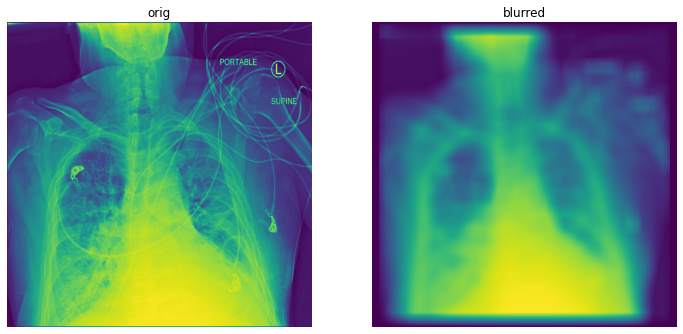

In [22]:
ims = xray_sample.hist_scaled(), uniform_blur2d(xray_sample.hist_scaled(),50)
show_images(ims, titles=('orig', 'blurred'), figsize=(12, 6))

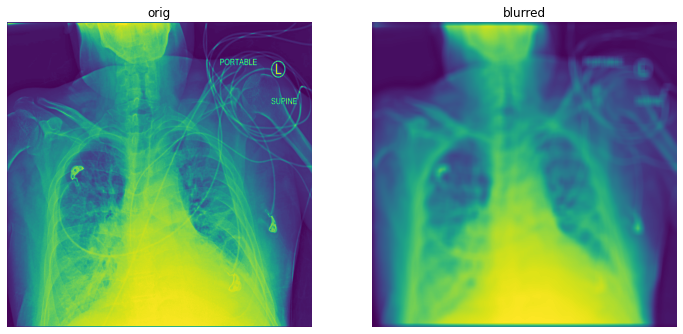

In [23]:
ims = xray_sample.hist_scaled(), gauss_blur2d(xray_sample.hist_scaled(),50)
show_images(ims, titles=('orig', 'blurred'), figsize=(12, 6))

In [0]:
# xray_sample.mask_from_blur??

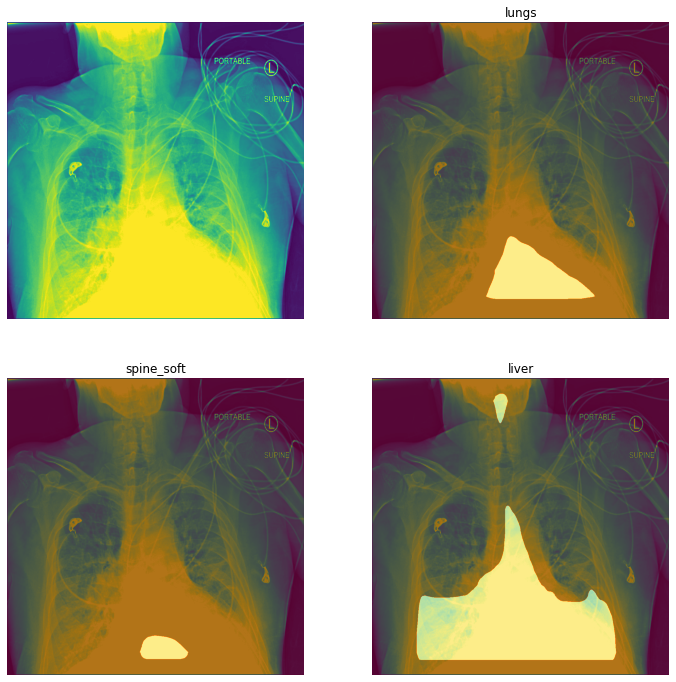

In [25]:
wind = xray_sample.windowed(*dicom_windows.lungs)
mask1 = xray_sample.mask_from_blur(dicom_windows.lungs)
mask2 = xray_sample.mask_from_blur(dicom_windows.spine_soft)
mask3 = xray_sample.mask_from_blur(dicom_windows.liver)

_,ax = subplots(2,2, figsize=(12, 12))
ax = ax.reshape(-1)
show_image(wind, ax=ax[0])
show_image(wind, ax=ax[1])
show_image(wind, ax=ax[2])
show_image(wind, ax=ax[3])

show_image(mask1, alpha=0.5, cmap=plt.cm.Reds, ax=ax[1], title="lungs");
show_image(mask2, alpha=0.5, cmap=plt.cm.Reds, ax=ax[2], title="spine_soft");
show_image(mask3, alpha=0.5, cmap=plt.cm.Reds, ax=ax[3], title="liver");

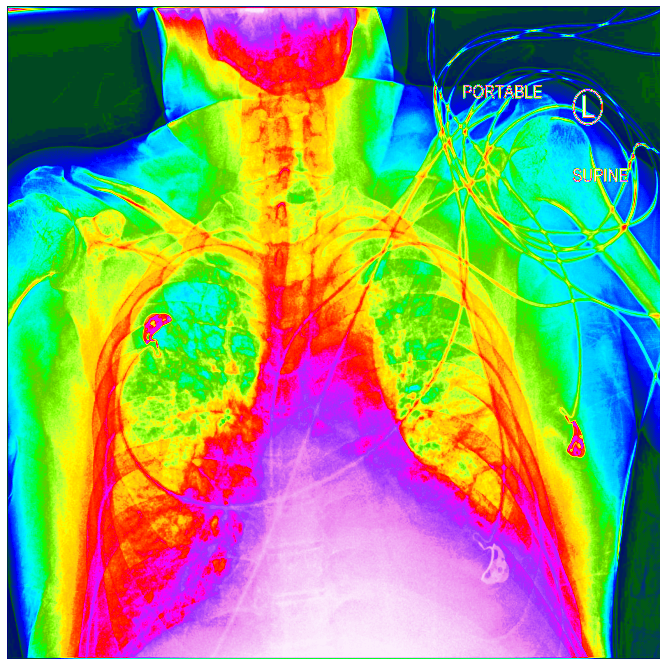

In [26]:
xray_sample.show(cmap=plt.cm.gist_ncar, figsize=(12, 12))

In [27]:
mask = mask1
bbs = mask2bbox(mask)
bbs

tensor([[   0,    0],
        [1023, 1023]], device='cuda:0')

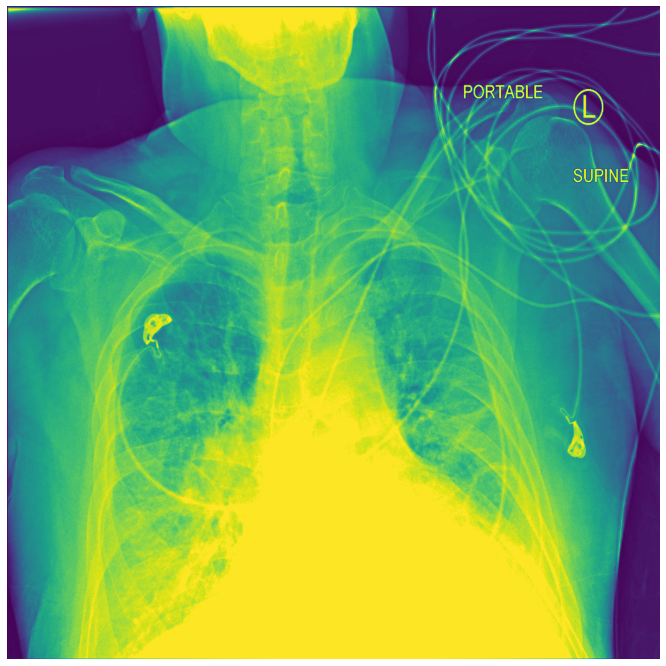

In [28]:
lo,hi = bbs
show_image(wind[lo[0]:hi[0],lo[1]:hi[1]], figsize=(12, 12));

In [29]:
df = pd.read_csv(path/'train-rle.csv')
df.head()

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.5597.1517875188.959090,-1
1,1.2.276.0.7230010.3.1.4.8323329.12515.1517875239.501137,-1
2,1.2.276.0.7230010.3.1.4.8323329.4904.1517875185.355709,175349 7 1013 12 1009 17 1005 19 1003 20 1002 22 1001 22 1000 23 1000 23 1000 23 999 24 999 23 1000 23 999 23 1000 22 1001 21 1001 22 1001 21 1002 21 1001 22 1001 21 1002 21 1001 22 1001 21 1002 21 1001 22 1001 21 1002 21 1002 21 1002 20 1003 20 1002 21 1001 23 1000 23 999 24 999 24 999 23 999 24 999 24 998 26 996 27 995 28 995 28 994 30 993 30 993 30 993 30 993 31 992 31 992 31 992 31 992 32 990 33 990 33 990 33 991 31 992 31 992 31 992 31 992 31 992 31 992 31 992 31 992 31 992 31 992 31 993 30 993 30 993 30 993 30 994 29 994 29 994 30 993 30 994 29 994 30 993 30 993 31 993 31 992 31 992...
3,1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312,407576 2 1021 7 1015 10 1013 12 1011 14 1008 17 1006 19 1005 20 1003 21 1003 22 1001 23 1001 24 999 25 999 25 999 26 997 27 997 27 996 28 996 28 996 29 994 30 994 30 994 30 993 31 993 32 992 32 992 32 992 32 991 33 991 33 991 33 991 33 991 33 990 34 990 34 990 34 990 34 990 34 989 35 989 36 988 36 988 16 1 19 988 15 3 18 988 15 4 16 989 14 8 13 989 14 8 13 989 13 9 13 989 13 9 13 989 12 10 13 989 12 10 13 989 11 11 13 989 11 11 13 989 11 11 13 989 10 11 14 989 10 11 14 990 9 9 16 990 9 7 18 990 9 6 18 991 9 6 18 991 9 5 19 992 8 4 20 992 7 5 20 993 6 4 21 993 6 4 21 994 4 4 22 995 3 5 20 ...
4,1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1015 8 1014 9 1014 9 1013 10 1013 10 1012 11 1011 12 1010 12 1011 12 1010 13 1009 14 1008 15 1008 15 1007 16 1007 16 1006 17 1006 17 1005 17 1005 18 1004 19 1004 18 1004 19 1004 19 1002 21 1001 22 1001 22 1000 23 1000 23 999 24 997 26 997 25 997 26 997 26 997 26 996 27 996 27 996 27 995 27 996 27 996 27 996 28 995 28 995 28 995 28 994 28 995 28 995 28 995 27 996 27 996 27 996 28 995 28 995 28 995 28 994 30 993 30 993 30 994 29 994 28 995 28 995 28 994 30 993 30 993 30 994 29 994 30 993 30 993 30 994 30 993 30 993 30 993 31 992 31 992 32 991 32 9...


In [0]:
# sorting by first name 
df.sort_values("ImageId", inplace = True) 
  
# dropping ALL duplicte values 
df.drop_duplicates(subset ="ImageId", 
                     keep = 'first', inplace = True) 
  

In [31]:
df.iloc[1, 1]

' -1'

In [32]:
df.loc[df.iloc[:, 1] == ' -1', 'label'] = "Normal"
df.loc[df.iloc[:, 1] != ' -1', 'label'] = "Pneumothorax"

df.sample(5)

,ImageId,EncodedPixels,label
718,1.2.276.0.7230010.3.1.4.8323329.11564.1517875233.637312,-1,Normal
8407,1.2.276.0.7230010.3.1.4.8323329.3035.1517875175.735591,-1,Normal
7939,1.2.276.0.7230010.3.1.4.8323329.3450.1517875177.893802,-1,Normal
10242,1.2.276.0.7230010.3.1.4.8323329.4411.1517875182.703161,-1,Normal
7118,1.2.276.0.7230010.3.1.4.8323329.31784.1517875156.807062,-1,Normal


In [33]:
df = df.drop(df.columns[[1]], axis=1)
df.head()

,ImageId,label
5667,1.2.276.0.7230010.3.1.4.8323329.1000.1517875165.878027,Normal
8268,1.2.276.0.7230010.3.1.4.8323329.10000.1517875220.938530,Normal
8707,1.2.276.0.7230010.3.1.4.8323329.10001.1517875220.930580,Normal
11189,1.2.276.0.7230010.3.1.4.8323329.10002.1517875220.939397,Normal
8802,1.2.276.0.7230010.3.1.4.8323329.10003.1517875220.942420,Normal


In [34]:
df['label'].value_counts()

Normal          8296
Pneumothorax    2379
Name: label, dtype: int64

In [35]:
df[df['ImageId'] == '1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312']

,ImageId,label
3,1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312,Pneumothorax


In [36]:
df[df['ImageId'] == '1.2.276.0.7230010.3.1.4.8323329.32579.1517875161.299312'].label.values[0]

'Pneumothorax'

In [37]:
df[df['ImageId'] == '1.2.276.0.7230010.3.1.4.8323329.10000.1517875220.938530'].label.values[0]

'Normal'

In [0]:
def label_func(fn):        
    lbl = df[df['ImageId'] == fn.stem].label.to_numpy()
    if len(lbl) == 0 : return "Normal"
    return lbl[0]

In [0]:
pneumothorax = DataBlock(blocks=(ImageBlock(cls=PILDicom), CategoryBlock), 
                         get_items=get_dicom_files, 
                         get_y=label_func, 
                         batch_tfms=[*aug_transforms(size=224)]
                         )

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


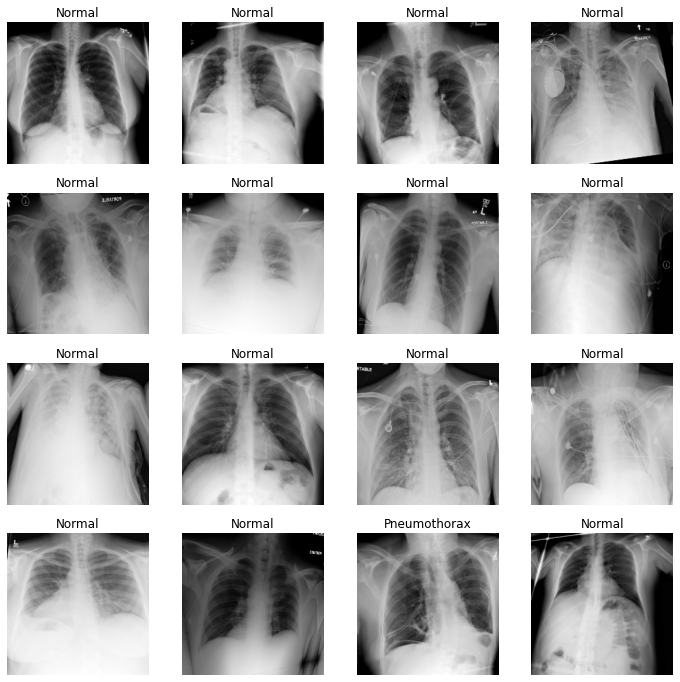

In [40]:
# pneumothorax.summary(path/'dicom-images-train')
dls = pneumothorax.dataloaders(path/'dicom-images-train', bs=64)
dls.show_batch(max_n=16)

In [41]:
dls.vocab

(#2) ['Normal','Pneumothorax']

In [0]:
learn = cnn_learner(dls, resnet34, metrics=accuracy, 
                    cbs=[ShowGraphCallback])

epoch,train_loss,valid_loss,accuracy,time
0,0.767545,0.506717,0.778711,01:54


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


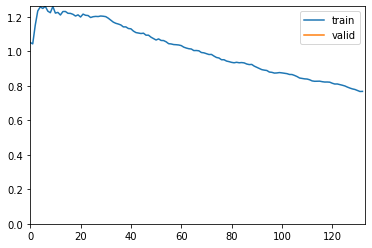

epoch,train_loss,valid_loss,accuracy,time
0,0.509306,0.396322,0.823529,01:55
1,0.434088,0.365987,0.829598,01:55
2,0.367843,0.339711,0.852941,01:55
3,0.327256,0.344286,0.852007,01:57
4,0.284703,0.329944,0.856209,01:54
5,0.250454,0.322512,0.855742,01:55


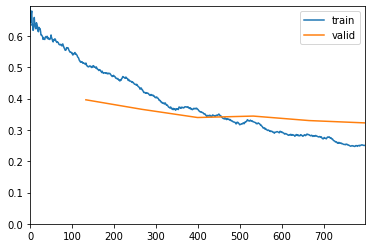

In [43]:
learn.fine_tune(6)

# Credit

* https://dev.fast.ai/medical.imaging
* https://www.kaggle.com/jhoward/don-t-see-like-a-radiologist-fastai
* https://www.kaggle.com/jhoward/some-dicom-gotchas-to-be-aware-of-fastai
* https://www.kaggle.com/jesperdramsch/siim-acr-pneumothorax-segmentation-data
* https://github.com/fastai/fastai2/blob/master/nbs/61_tutorial.medical_imaging.ipynb
* 